In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.random.seed(42)

class0_x = np.random.normal(5, 1, 100)
class0_y = np.random.normal(3, 1, 100)

class1_x = np.random.normal(8, 1, 100)
class1_y = np.random.normal(6, 1, 100)

X = np.concatenate([class0_x, class1_x])
Y = np.concatenate([class0_y, class1_y])
label = np.array([0]*100 + [1]*100)

df = pd.DataFrame({
    "Feature1": X,
    "Feature2": Y,
    "Class": label
})

1. Display the Basic Statistics using describe ()

In [4]:
print(df.describe())

         Feature1    Feature2       Class
count  200.000000  200.000000  200.000000
mean     6.480525    4.564572    0.500000
std      1.875644    1.797736    0.501255
min      2.380255    1.081229    0.000000
25%      4.849887    3.091879    0.000000
50%      6.479262    4.825793    0.500000
75%      8.089785    6.037334    1.000000
max     11.852731    8.189803    1.000000


2. Boxplot by output labels/classes

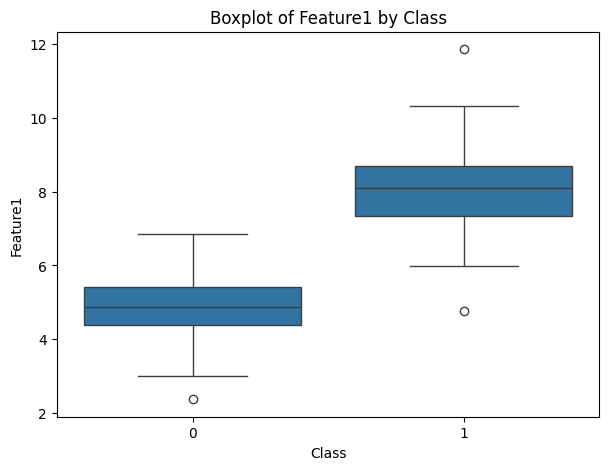

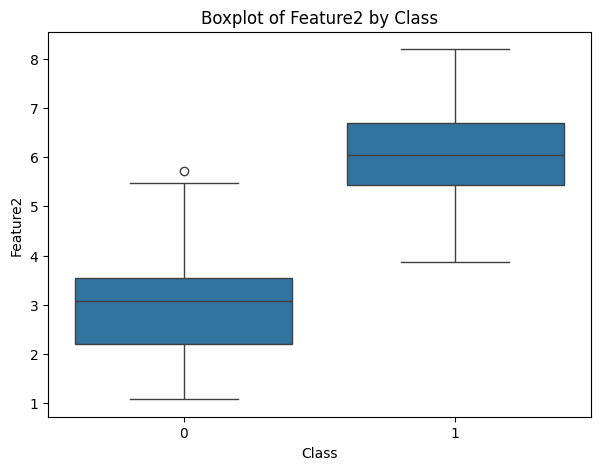

In [5]:
plt.figure(figsize=(7,5))
sns.boxplot(x="Class", y="Feature1", data=df)
plt.title("Boxplot of Feature1 by Class")
plt.show()

plt.figure(figsize=(7,5))
sns.boxplot(x="Class", y="Feature2", data=df)
plt.title("Boxplot of Feature2 by Class")
plt.show()

3. Scatterplot using two variable

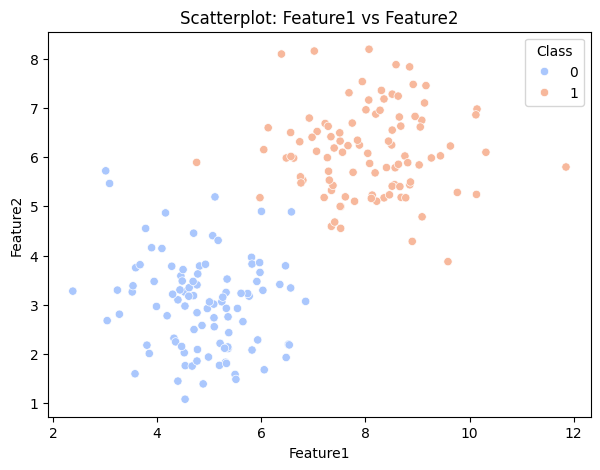

In [6]:
plt.figure(figsize=(7,5))
sns.scatterplot(x="Feature1", y="Feature2", hue="Class", palette="coolwarm", data=df)
plt.title("Scatterplot: Feature1 vs Feature2")
plt.show()

4. Plot Co-Variance Matrix

          Feature1  Feature2
Feature1   3.51804  2.396900
Feature2   2.39690  3.231853


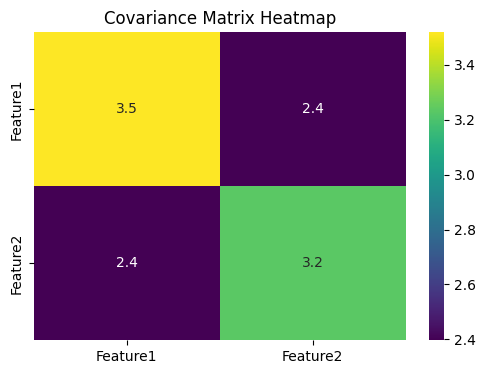

In [8]:
cov_matrix = df[["Feature1", "Feature2"]].cov()
print(cov_matrix)

plt.figure(figsize=(6,4))
sns.heatmap(cov_matrix, annot=True, cmap="viridis")
plt.title("Covariance Matrix Heatmap")
plt.show()


5. Data Scaling

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[["Feature1", "Feature2"]])
df_scaled = pd.DataFrame(scaled_data, columns=["Scaled_Feature1", "Scaled_Feature2"])
df_scaled["Class"] = label
print(df_scaled.head())


   Scaled_Feature1  Scaled_Feature2  Class
0        -0.525835        -1.661769      0
1        -0.865224        -1.107059      0
2        -0.445141        -1.063601      0
3         0.022718        -1.319877      0
4        -0.916475        -0.962427      0


6. Show better class separation using principal components

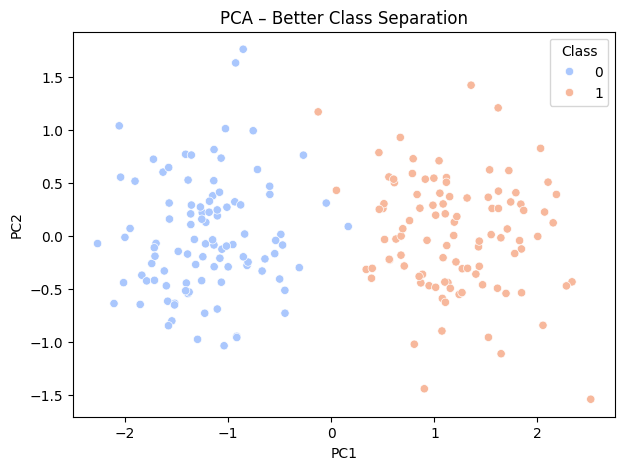

In [10]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df_pca = pd.DataFrame(pca_data, columns=["PC1", "PC2"])
df_pca["Class"] = label

plt.figure(figsize=(7,5))
sns.scatterplot(x="PC1", y="PC2", hue="Class", palette="coolwarm", data=df_pca)
plt.title("PCA – Better Class Separation")
plt.show()